# Computing eigenvalues.

In [1]:
A = [ 0 -17 21;
      0 13 -15;
      0 10 -12
];
chi = poly(A)
lambdas = eig(A)


chi =

    1.0000   -1.0000   -6.0000         0


lambdas =

         0
    3.0000
   -2.0000



In [2]:
n = size(A,1);
N = 100;
q0 = rand(n,1)
epsilon = 1e-6;
q = q0./norm(q0);
lambda_curr = zeros(n,1);
for k = 1:N
    lambda_prev = lambda_curr;
    v = A*q;
    lambda_curr = q'*v;
    q = v./norm(v);
    if abs(lambda_curr - lambda_prev)<epsilon
        break;
    end
end
lambda_curr


q0 =

    0.8147
    0.9058
    0.1270


lambda_curr =

    3.0000



The algorithm is only able to solve one possible $\lambda$.

In [3]:
for k = 1:N
    [L,U] = lu(A);
    A = U*L;
end
A
diag(A)


A =

         0   -3.0000   21.0000
         0    3.0000  -15.0000
         0    0.0000   -2.0000


ans =

         0
    3.0000
   -2.0000



The diagonal elements of the output are the eigenvalues of matrix $A$.

# Interpolation points

The observation points are equally spaced with $h = 0.5$, then
$$
c_{j-1} + 4c_j + c_{j+1} = \frac{3}{h^2} (a_{j+1}-2a_j+a_{j-1})
$$
for $j = 1,\cdots,n-1$


In [4]:
x = [0 0.5 1 1.5 2];
y = [0.5 1.425639 2.640859 4.009155 5.305472];
h = 0.5;
k = 3/(h.^2);
n = length(x) - 1
%Solve a
a = zeros(n+1,1);
for i=1:(n+1) 
    a(i) = y(i); 
end
a(1:n);


n =

     4



## a

In [5]:
%Solve c
cc = zeros(n-1,n-1);
for i=2:(n-2) 
    cc(i,i-1) = 1;
    cc(i,i) = 4;
    cc(i,i+1) = 1;
end
cc(1,1) = 6;
cc(n-1,n-1) = 6;
cc
aa = zeros(n-1,1);
for i = 2:n
    aa(i-1) = (a(i-1) - 2*a(i) + a(i+1))*k;
end
aa
c = cc\aa;
c0 = 2*c(1)-c(2)
c = [c0;c]
% Compute b and d
d = zeros(n,1);
b = zeros(n,1);
for i = 1:n-1
    d(i) = (c(i+1) - c(i))/(3*h);
    b(i) = (a(i+1)-a(i))/h - (2*c(i)+c(i+1))*h/3;
end
d(n) = d(n-1)
b(n) = b(n-1) + (c(n)+c(n-1))*h
% Combine efficients
coefs_nak = [d c b a(1:n)] 
obs = x';
nak = mkpp(obs, coefs_nak);
%Verification
s = spline(x,y);
standard_nak = s.coefs()


cc =

     6     0     0
     1     4     1
     0     0     6


aa =

    3.4750
    1.8369
   -0.8637


c0 =

    0.8079


c =

    0.8079
    0.5792
    0.3504
   -0.1440


d =

   -0.1525
   -0.1525
   -0.3296
   -0.3296


b =

    1.4855
    2.1790
    2.6438
    2.7470


coefs_nak =

   -0.1525    0.8079    1.4855    0.5000
   -0.1525    0.5792    2.1790    1.4256
   -0.3296    0.3504    2.6438    2.6409
   -0.3296   -0.1440    2.7470    4.0092


standard_nak =

   -0.1525    0.8079    1.4855    0.5000
   -0.1525    0.5792    2.1790    1.4256
   -0.3296    0.3504    2.6438    2.6409
   -0.3296   -0.1440    2.7470    4.0092



## b

In [6]:
yp = [1.5 2.305472];
for i=1:n 
    h(i) = x(i+1)-x(i); 
end
cc = zeros(n+1,n+1);
for i = 2:n
    cc(i,i) = 2*(h(i)+h(i-1));
    cc(i,i-1) = h(i-1);
    cc(i-1,i) = h(i-1);
end
cc(1,1)=2*h(1); 
cc(n+1,n+1) = 2*h(n); 
cc(n+1,n) = h(n); 
cc(n,n+1) = h(n);
aa = zeros(n+1,1);
for i=2:n 
    aa(i) = 3*(a(i+1)-a(i))/h(i) - 3*(a(i)-a(i-1))/h(i-1); 
end
aa(1) = 3*(a(2)-a(1))/h(1) - 3*yp(1); 
aa(n+1) = 3*yp(2) - 3*(a(n+1)-a(n))/h(n);
c = cc\aa;
% Compute b and d
d = zeros(n,1);
b = zeros(n,1);
for i = 1:n
    d(i) = (c(i+1)-c(i))/(3*h(i));
    b(i) = (a(i+1)-a(i))/h(i)-h(i)*(c(i+1)+2*c(i))/3;
end

% Combine efficients
coefs_cs = [d c(1:4) b a(1:n)] 
obs = x';
cs = mkpp(obs, coefs_cs);
%Verification
cs = spline(x,[1.5 y 2.305472]);
cs.coefs


coefs_cs =

   -0.1063    0.7557    1.5000    0.5000
   -0.1747    0.5963    2.1760    1.4256
   -0.2869    0.3342    2.6412    2.6409
   -0.4782   -0.0961    2.7602    4.0092


ans =

   -0.1063    0.7557    1.5000    0.5000
   -0.1747    0.5963    2.1760    1.4256
   -0.2869    0.3342    2.6412    2.6409
   -0.4782   -0.0961    2.7602    4.0092



## c

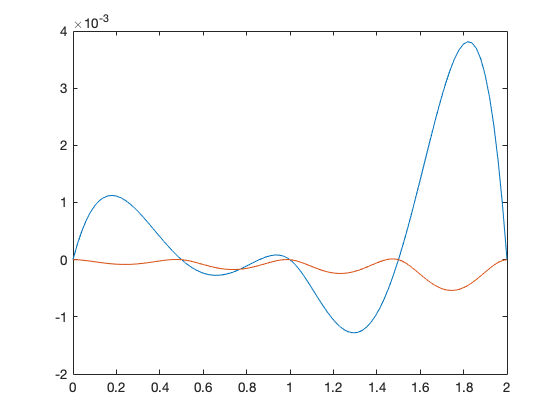

In [7]:
t = linspace (0,2);
f = (1+t).^2 - 0.5*exp(t);
plot(t, f - ppval(nak,t))
hold on;
plot(t, f - ppval(cs,t))

The clamped result is better.

# Lake Pollution

## a



ans =

  -38.4000



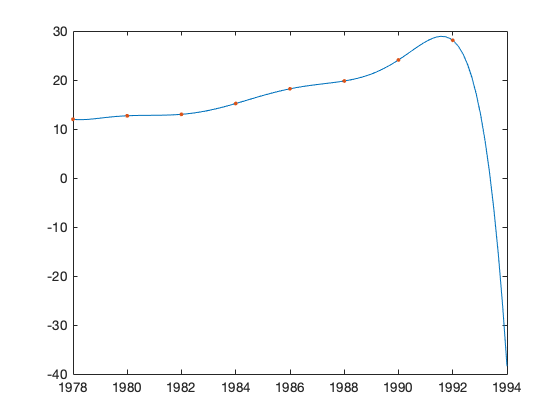

In [8]:
x=[1978 1980 1982 1984 1986 1988 1990 1992];
y=[12.0 12.7 13.0 15.2 18.2 19.8 24.1 28.1];
syms t;                    
n = length(x);           
L = 0;
for(i = 1:n)                    
    e = 1;                   
    for j = 1:n
        if (i~=j)
          e = e*((t-x(j))/(x(i)-x(j)));
        end
    end
    L = L + e*y(i);  
end
t = linspace (1978,1994);
r = eval(L);
plot(t,r)
hold on;
plot(x,y,'.')
t = 1994;
eval(L)

## b


ans =

   26.4407



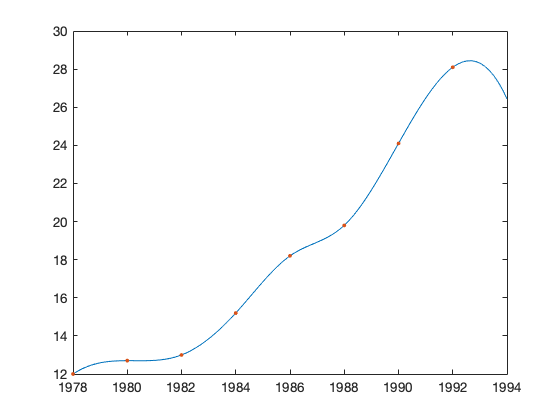

In [9]:
x=[1978 1980 1982 1984 1986 1988 1990 1992];
y=[12.0 12.7 13.0 15.2 18.2 19.8 24.1 28.1];
t = linspace (1978,1994);
r = spline(x,y,t);
plot(t,r)
hold on;
plot(x,y,'.')
spline(x,y,1994)

## c

The cubic spline result makes more sense because functions of high degree causes much bias.